In [1]:
import numpy as np
import matplotlib.pyplot as plt

随机生成一组数据

In [4]:
raw_data_X = [[6.33181452, 2.94735401],
       [4.34505246, 4.47892265],
       [2.82942145, 9.00037313],
       [2.26815615, 7.08619789],
       [8.92238522, 3.0757727 ],
       [3.27298452, 0.17596731],
       [8.46648238, 9.92648191],
       [2.88533803, 4.4372681 ],
       [6.13661005, 1.35983593],
       [4.69915771, 2.93238479]]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [5]:
# 转换为numpy数组
train_X = np.array(raw_data_X)
train_y = np.array(raw_data_y)

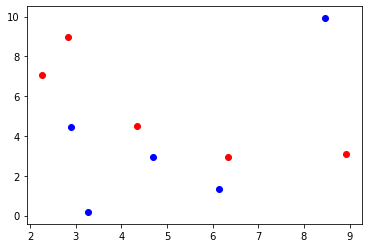

In [6]:
# 对数据进行可视化
plt.scatter(train_X[train_y==0, 0], train_X[train_y==0, 1], color="red")
plt.scatter(train_X[train_y==1, 0], train_X[train_y==1, 1], color="blue")

In [9]:
# 随机生成一个点
test_data = np.random.random(size=(2))*10
test_data

array([2.68887591, 1.17099245])

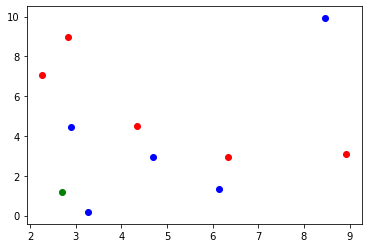

In [10]:
plt.scatter(train_X[train_y==0, 0], train_X[train_y==0, 1], color="red")
plt.scatter(train_X[train_y==1, 0], train_X[train_y==1, 1], color="blue")
plt.scatter(test_data[0], test_data[1], color="green")

现在，我们要使用knn算法来判断这个绿点应该属于蓝色部分，还是属于红色部分

1、首先要计算出它和其他点的距离，这里使用欧氏距离来进行计算

In [15]:
from math import sqrt

In [16]:
dist = [sqrt(np.sum((test_data-train_x)**2)) for train_x in train_X]
dist

[4.052957205107072,
 3.699367917712326,
 7.83064205148888,
 5.93014844328091,
 6.518038516872486,
 1.1538014940934156,
 10.489963405450801,
 3.2721787863370033,
 3.452902047185578,
 2.672776813670644]

2、现在对刚才得到的距离数组进行一下排序

In [17]:
dist_ind = np.argsort(dist)
dist_ind

array([5, 9, 7, 8, 1, 0, 3, 4, 2, 6], dtype=int64)

3、假设我们的参数k=3，现在选出前三个距离

In [19]:
dist_ind[:3]

array([5, 9, 7], dtype=int64)

找到那前三个距离对应的训练数据的标签值

In [23]:
topk_y = train_y[dist_ind[:3]]
topk_y

array([1, 1, 1])

对这几个数据的标签值进行统计

In [21]:
# 导入Counter模块
from collections import Counter

In [24]:
Counter(topk_y)

Counter({1: 3})

In [27]:
votes = Counter(topk_y).most_common(1)
votes

[(1, 3)]

这样，我们就求出了测试数据的标签，属于 1 类

In [28]:
test_data_y = votes[0][0]
test_data_y

1